In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib.lines import Line2D

import energy_analysis_helpers

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-vu0ck52r because the default path (/home/sarslan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
FIG_SIZE = (8,5)
plt.rcParams["figure.figsize"] = FIG_SIZE
FONT_SIZE = 16
LINE_STYLE = (0,(4,4))
LINE_WIDTH = 3.5
SAVE_FIG = False

In [3]:
EXP_ID = '230518-1856'
data_folder = '../data/' + EXP_ID + '/'
exp_filename = data_folder + 'energy.log'

if (SAVE_FIG):
    out_dir = '../outputs/' + EXP_ID + '/'
    if (not os.path.exists(out_dir)):
        os.mkdir(out_dir)

# Reading the Experiment Data

In [4]:
exp_df = energy_analysis_helpers.read_energy_log(exp_filename)
exp_df['energy_kJ'] = exp_df['energy_uJ'] * 10e-9
exp_df = energy_analysis_helpers.read_iperf_log(exp_df, data_folder)
exp_df

,cc,mtu,duration,cnt,energy_uJ,energy_kJ,total_cpu_util_percent,user_cpu_util_percent,system_cpu_util_percent,time_sec,sent_bytes,bps,rtx_pkts,min_rtt,mean_rtt,max_rtt,max_cwnd
0,sleep,1500,10.0,1,2.381425e+08,2.381425,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sleep,1500,10.0,2,2.239060e+08,2.239060,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sleep,1500,10.0,3,2.160165e+08,2.160165,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sleep,1500,10.0,4,2.226441e+08,2.226441,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sleep,1500,10.0,5,2.304108e+08,2.304108,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,cubic,1500,100.0,16,4.051246e+09,40.512458,45.738653,1.001897,44.736754,100.000086,1.016644e+11,8.133147e+09,39457.0,0.700,0.722,0.745,592232.0
394,cubic,1500,100.0,17,4.119311e+09,41.193108,45.656643,1.015153,44.641488,100.000026,1.068782e+11,8.550254e+09,34023.0,0.453,0.650,0.848,624088.0
395,cubic,1500,100.0,18,4.004686e+09,40.046858,41.471570,1.035540,40.436028,100.000187,1.038677e+11,8.309404e+09,36218.0,0.339,0.491,0.644,629880.0
396,cubic,1500,100.0,19,5.214171e+09,52.141710,37.859306,0.961278,36.898026,100.000429,1.047623e+11,8.380949e+09,32334.0,0.550,0.605,0.660,838392.0


# Energy Consumption Analysis

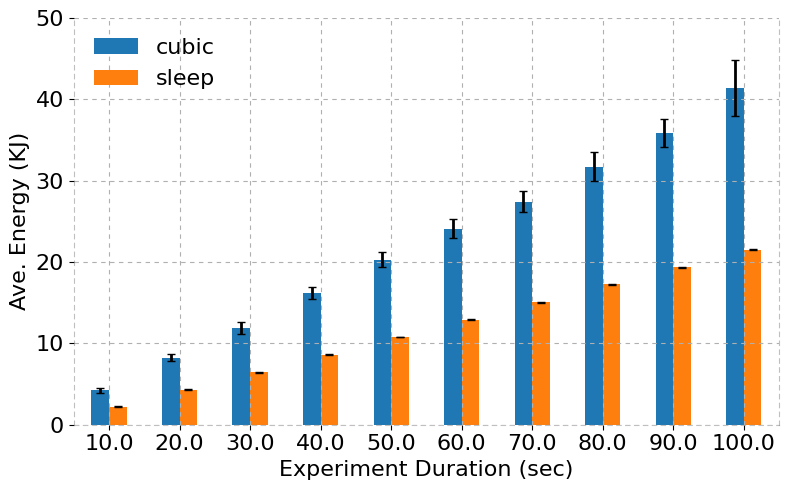

In [5]:
exp_df.groupby(['duration', 'cc'])['energy_kJ'].mean().unstack().plot.bar(
    yerr=exp_df.groupby(['duration', 'cc'])['energy_kJ'].std().unstack(), 
    error_kw=dict(lw=2, capsize=3, capthick=1, ecolor='black')
    )

plt.xlabel('Experiment Duration (sec)', fontsize=FONT_SIZE)
plt.ylabel('Ave. Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim((0,50))
plt.xticks(rotation = 0)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='upper left', frameon=False, fontsize=FONT_SIZE)
# plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/cubic_vs_sleep_energy.pdf')

plt.show()

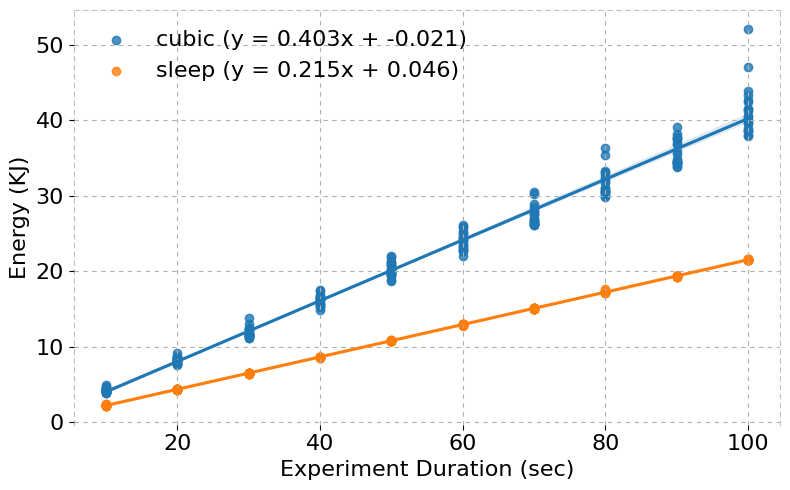

In [6]:
plt.figure(figsize=FIG_SIZE)

for cca, df in exp_df.groupby('cc'):
    x = np.hstack((np.reshape(df['time_sec'], (-1, 1)), np.ones((len(df),1))))
    y = np.reshape(df['energy_kJ'], (-1, 1))
    fit = np.linalg.lstsq(x, y, rcond=None)[0]

    sns.regplot(df, x = 'time_sec', y = 'energy_kJ', 
                label='{} (y = {:.3f}x + {:.3f})'.format(cca, fit[0][0], fit[1][0]), ax=plt.gca())

plt.xlabel('Experiment Duration (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
# plt.ylim((0,60))
plt.xticks(rotation = 0)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='upper left', frameon=False, fontsize=FONT_SIZE)
# plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
# plt.gca().spines["top"].set_visible(False)
plt.gca().spines["top"].set_linestyle(LINE_STYLE)
plt.gca().spines["top"].set_alpha(0.5)
plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_visible(False)
# plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
# plt.gca().spines["bottom"].set_alpha(0.5)
# plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/cubic_vs_sleep_energy_fit.pdf')

plt.show()